# Used Car Pricing Project

## Problem Statement 
The demand for used cars in the Indian Market has increased and Cars4U is seeking for analytically sound insights which will help them gain an edge in this rapidly rising market. The pricing scheme for used cars is paramount as the demand is increasing and the supply is genrally uncertain. Cars4U requires a sound pricing model to guide their sales in the used car market.


## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


## Objective

* To explore and visualize the dataset
* Build a linear regression model to predict the prices of used cars
* Generate a set of insights and recommendations that will help the business.


## Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Setting Up the Environment

Setting up the modeling environment requires various libraries and settings in order to use the necessary tools to build a pricing model.

In [1]:
# Necessary to fix a version error with mlxtend
!pip install mlrose

In [2]:
# Necessary to fix a version error with mlxtend
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [3]:
# Import all the libraries for the project

# Libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # used for nicer overlay in plots
%matplotlib inline

# Library for supressing warnings 
import warnings
warnings.filterwarnings('ignore') 

# Modeling library 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

# Model performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Library for backward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Importing the Data and Conducting Basic Data Checks

In addition to setting up the modeling environment, the historical data must be sourced and then checke dto understand its quality, validity, and usefulness for the modeling purposes.

In [4]:
# I use Google CoLab so this links to my personal Google Drive for the data
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Changes the directory to the folder for the Linear Regression folder in my Google Drive
%cd /content/drive/My\ Drive/UT\ AIML/Supervised\ Learning/Linear\ Regression/ 

/content/drive/My Drive/UT AIML/Supervised Learning/Linear Regression


In [6]:
# Imports the Cars4U Dataset 
used_cars = pd.read_csv('used_cars_data.csv')

Examing only the first 5 rows of the dataset is very revealing. For example, we can clearly see that that are different numerical and non-nomeric data types which must be measured and tested before modeling can begin. We can also see that there are some variables which require transformations and others which we can simply exclude from the model. Additonally, we can see that there are some missing values for the column New_Price and we will need to take steps to correct this or exclude the column altogether.

In [7]:
# Displays the first 5 rows of the set for a quick view of the raw data
used_cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
# Check a random sample of the data
used_cars.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


Checking the the number of rows and columns or the "shape" of the data is important to understand how much data we're dealing with and it's dimensions.

In [9]:
# Checks the number of rows and columns in the dataset 
print(f"There are {used_cars.shape[0]} rows and {used_cars.shape[1]} columns.")

There are 7253 rows and 14 columns.


By running a high level statistical summary on the numeric variables we can begin to see some of it's features and characteristics. For example, there appears to be an outlier or outliers in the Kilometers_Driven field since the Max is 6,500,000. This will need to be investigated and dealt with properly.

In [10]:
# Calculates summary statistics on numerical columns and transpose with .T to make the summary easier to read
used_cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* `S.No.`: This is not a meaningful variable and can be dropped. 
* `Name`: There are a large number of vehicle names which is a combination of the vahice make, model, trim, and drivetrain in some instances. 
* `Location`: There are 11 locations whichc an be one hot encoded for modeling.
* `Year`: The vehicle year ranges from 1996 to 2019. It may be better to convert this variables into age. 
* `Kilometers_Driven`: It looks like there is a major outlier based off the maximum value that is so high. 
* `Fuel_Type`: There are 5 different types of fuel with diesel being the most frequent and this variable can also be encoded for modeling.
* `Transmission`: Tehre are only 2 types of transmissions and manual is the most frequently occurring. 
* `Owner_Type`: This column can be manually encoded with rank ordered numerical values. First owner is the most frequently occurring and the number of owners goes all the way to 5. 
* `Mileage`: There are character values in this column which will need to be separated from the numeric values before modeling.
* `Engine`: The standard for enigine measurement is cubic centimeters (CC), but the characters will need to be separated from the numeric values.
* `Power`: Again, the engine column has characters in which will need to be removed.   
* `Seats`: The seats range from 0 to 10, and since a car cannot 0 seats then we know that we'll have to investigate this variabls for erroneous entries. 
* `New_Price`: This variable has characters in and appears to ave a lot of missing values so it will need to be cleansed and checked.
* `Price`: This is the target variable and will need to be checked, then cleaned, and finally separated from the rest of the data before modeling.

Other simple data checks help us to understand what type of data we're dealing with and the number of missing values across the entire dataset by each column. We can see that we're dealing with a combination of numerical and text data that will need to be converted before training the rgression model.

In [11]:
# Checks the non-nulls and basic info
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


There are some variables which are nonessential as they don't provide any information that would presumably be of use to our model. The name of the vehicle and the serial number are of no consequence for modeling purpose, therefore they can simply be removed. 

In [12]:
# Drops the Serial Number since it isn't meaningful for 
used_cars.drop(['S.No.'],axis=1,inplace=True)

## Data Preprocessing

The data preprocessing stage is the step in which we work to clean the data and prepare it for the closer examination. This stage includes manipulating the data, removing certain elements based on our scrutiny, and ensuring we have as clean a dataset as we can get for our model.

### Checking Null Values

The model cannot compute null values and so these missing elements must be dealt with. In some isntances they can be replaced and in other instances they can be removed, however they cannot be ignored.

We can calculated the percentage of missing values for each column and determine how much of the data is missing in each column.

In [13]:
# Displays the null values in the form of a percentage
print(used_cars.isna().mean().round(4) * 100)

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 2.41
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64


Since the New_Price column has over 86% of it's values missing, it is safe to simply drop this variable. It would be a total guess at what these values could or should be, therefore we do not want to leave these values to guessing and diminish our model's predictive abilties.

In [14]:
# Drops the the entire column New_Price since it has over 86% of the data missing
used_cars.drop(['New_Price'],axis=1,inplace=True)

Since Price is the dependent variable that we're predicting, we need to be careful when replacing or imputing tht variable. Doing this could introduce a faulty bias in the predictions and so one way to avoid this is to remove rows that have a missing price.

In [15]:
# Drops the rows that have a missing value in the Price column
used_cars.dropna(subset=['Price'], inplace=True)

The `Mileage`, `Engine`, `Power`, and `Seats` columns still have missing values but need to be cleaned first then imputed. 

### Handling Duplicate Rows

This is a simple check to see if there are duplicates in the data and drops them if there are any because this could influence the model. 

In [16]:
# Check the total count of duplicate rows
used_cars.duplicated().sum()

0

There are no duplicate values in the dataset. 

### Removing Character Values from Numerical Measures

Our model will be a linear regression model and requires only numeric values. Since we can see that there are numerical values which have text appened to them to indicate a measurement, we strip the text from these elements, convert them to actual numerical values, and still be able to understand their meaning from the column headers.

In [17]:
# Removes the characters from Engine and Power then converts to integer
def char_strip(df, column):
    df[column] = df[column].str.replace(r'\D+', '', regex = True) # uses regular expression to match any non-digit 
    df[column] = pd.to_numeric(df[column])
    #df[column].fillna(value = 0, inplace = True) # replaces nulls with 0 

In [18]:
# Calls the function on each column
char_strip(used_cars, "Engine")
char_strip(used_cars, "Power")

In [19]:
# Looks like the function worked!
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,5816.0,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,1262.0,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,887.0,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,8876.0,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,1408.0,5.0,17.74


The `Mileage` column has 2 units of measurement, km/kg and kmpl. A quick search online reveals that we can convert km/kg to kmpl by multiplying the numeric value by 1.4 which will make all the mileage the same unit of measure. 

In [20]:
# Checks for missing mileage 
print(used_cars['Mileage'].isna().sum())

2


In [21]:
# Removes the rows with missing mileage
used_cars.dropna(subset=['Mileage'], inplace=True)

In [22]:
# Extracts mileage and covnerts to the same unit 
convert_mileage = []
for i in used_cars.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        convert_mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        convert_mileage.append(float(i))

In [23]:
# Replaces the original values with the cleaned and converted values
used_cars['Mileage']=convert_mileage

In [24]:
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,5816.0,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,1262.0,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,887.0,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,8876.0,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,1408.0,5.0,17.74


### Feature Engineering

In this situation, the age of the vehicle may be more meaningful than the year of the vehicle for modeling purposes.  

In [25]:
# Converts the Year column into Age and drops Year
used_cars['Age'] = 2021 - used_cars.Year

In [26]:
# Drops the Year column 
used_cars.drop(['Year'],axis=1,inplace=True)

The `Name` feature contains the make, model, and in some cases the trim. We can split the column into Make and Model so the feature becomes useful for modeling.

In [27]:
# Checks the number of Make/Model combinations
used_cars["Name"].nunique()

1874

In [28]:
# Extracts the make from the Name column
used_cars["Make"] = used_cars["Name"].apply(lambda x: x.split(" ")[0].lower())
used_cars.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,37.24,998.0,5816.0,5.0,1.75,11,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.60,1582.0,1262.0,5.0,12.50,6,hyundai
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.00,1199.0,887.0,5.0,4.50,10,honda
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.70,1248.0,8876.0,7.0,6.00,9,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.00,1968.0,1408.0,5.0,17.74,8,audi


In [29]:
# checking the unique values and their number of occurences
used_cars["Make"].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            410
mercedes-benz     318
volkswagen        315
ford              300
mahindra          271
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Make, dtype: int64

* There are 30 unique vehicle makes that were extracted from the `Name` column.

In [30]:
# Extracts model name
used_cars["Model"] = used_cars["Name"].apply(lambda x: x.split(" ")[1].lower())
used_cars.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,37.24,998.0,5816.0,5.0,1.75,11,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.60,1582.0,1262.0,5.0,12.50,6,hyundai,creta
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.00,1199.0,887.0,5.0,4.50,10,honda,jazz
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.70,1248.0,8876.0,7.0,6.00,9,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.00,1968.0,1408.0,5.0,17.74,8,audi,a4


In [31]:
# checking the unique values and their number of occurences
used_cars["Model"].value_counts()

swift         353
city          270
i20           247
verna         170
innova        164
             ... 
xuv300          1
fortwo          1
countryman      1
clubman         1
f               1
Name: Model, Length: 209, dtype: int64

* There are 209 unique model names in the dataset.

In [32]:
# Drops the Name column
used_cars.drop(columns="Name", inplace=True)

In [33]:
# Prints the value counts for the categorical variables 

num_to_display = 10  # defining this up here so it's easy to change later

for colname in used_cars.dtypes[used_cars.dtypes == "object"].index:
    val_counts = used_cars[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64
-------------------------------------------------- 

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
-------------------------------------------------- 

maruti           1211
hyundai          1107
honda             608
toyota            410
mercedes-benz     318
volkswagen        315
ford              300
mahindra          271
bmw               267
audi              236
Name: Make, dtype: int64
Only displayi

* The categorical variables appear to be cleaned and sorted out now.

## Exploratory Data Analysis

Next, we move on to exploring the data visually to understand how the variable behave indepently and together. With this we can already see some patterns arise in when these variables are plotted against one another. For example, we can see a positive association between Price and Seats, a slightly psoitive association between Engine size and Price, and a negative assiocation between Kilometers and Price. Additioanlly we can also see in the correlation heatmap that there is a strong positive correlation between the Engine size and the Price as well a strong negative correlation between Pric and Age. 

### Univariate Analysis

#### Histogram and Boxplot Function

In [34]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# The boxplot and a histogram are along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot on top of a histogram for numerical data

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Kilometers Driven

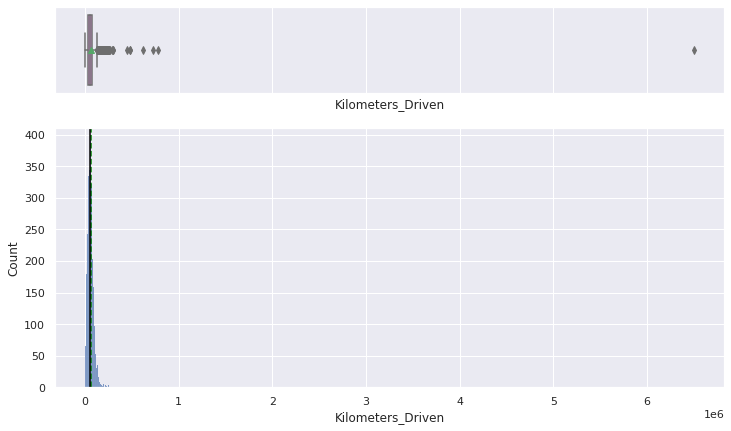

In [35]:
histogram_boxplot(used_cars, "Kilometers_Driven")

* The data is heavily skewed to the right and has major outlier to the right of the mean. 
* A log transformation can help to normalize the data (for a right skewed distribuion) and the outliers can be handled separately.

##### Outliers  

To remove the outliers, we can set a cap to remove the the two vehicles that very expensive. These two cars are very luxurious Italian sports cars that will always be priced incredibly high and can be separated from the other more common cars since we know these cars will almost certainly have a much higher price than the other vehicles. 

In [36]:
used_cars.drop(used_cars[used_cars['Kilometers_Driven'] > 775000].index, inplace = True)

##### Log Transformation

In [37]:
# Creates a new column with the log of the kilometers driven
used_cars["kilometers_driven_log"] = np.log(used_cars["Kilometers_Driven"])

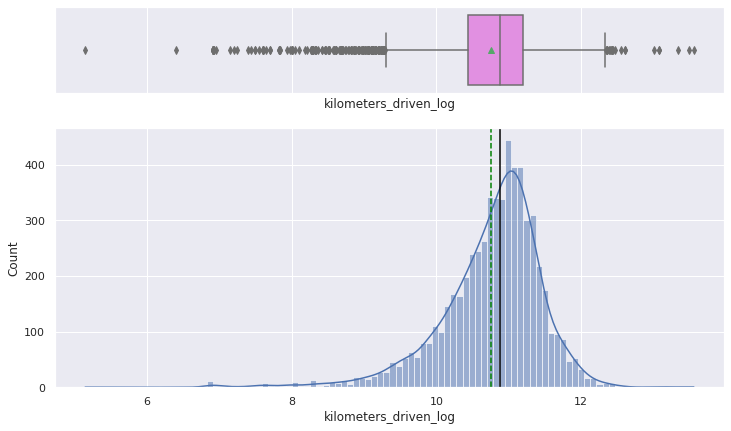

In [38]:
histogram_boxplot(used_cars, "kilometers_driven_log", bins=100, kde=True)

* The log transformation has effectively normalized the data. 

#### Mileage

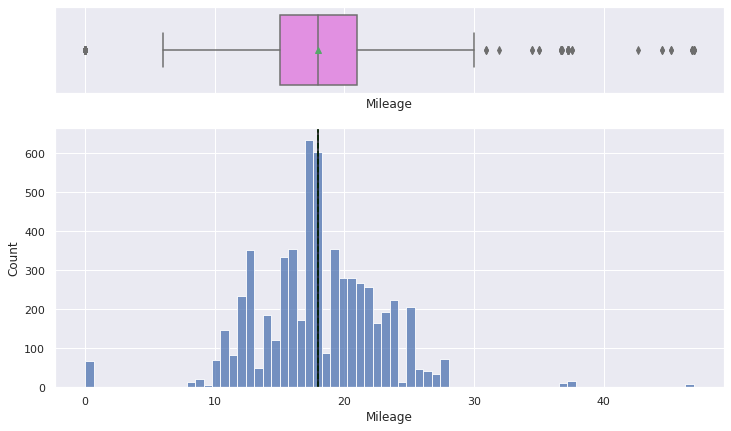

In [39]:
histogram_boxplot(used_cars, "Mileage")

* The distribution looks relatively normal although there are some outliers that need to be removed and there some 0 values which need to be investigated.

##### Replacing 0's

* There are some 0 values for mileage which need to be repalced as we know that's not a likely scenario, especially for used cars. 

In [40]:
used_cars.loc[used_cars["Mileage"] == 0]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make,Model,kilometers_driven_log
14,Pune,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50,9,land,rover,11.350407
67,Coimbatore,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67,2,mercedes-benz,c-class,9.640108
79,Hyderabad,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.30,16,hyundai,santro,11.380434
194,Ahmedabad,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,14,honda,city,11.002200
229,Bangalore,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60,6,ford,figo,11.162460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Mumbai,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,2.20,20,toyota,qualis,12.332705
5875,Ahmedabad,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.00,2,mercedes-benz,c-class,8.294050
5943,Chennai,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,1.70,19,mahindra,jeep,11.225243
5972,Mumbai,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,1.39,13,hyundai,santro,11.082143


* There are 68 rows with a 0 value for mileage which need to be replaced with a null so we can impute them later. 

In [41]:
# Replaces the 0 with a null
used_cars.loc[(used_cars.Mileage == 0.0),'Mileage']= np.nan

In [42]:
# Replaces the 0 value with null
# used_cars["Mileage"] = used_cars["Mileage"].replace(0.0, np.nan, inplace=True)

In [43]:
# Checks for missing mileage 
print(used_cars['Mileage'].isna().sum())

68


* All 68 zero values have been replaced with a null value

In [44]:
# Check for zeros
used_cars.sort_values(by=["Mileage"], ascending=True).head(10)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make,Model,kilometers_driven_log
5781,Delhi,6500,Petrol,Automatic,Third,6.0,5204.0,560.0,2.0,120.00,10,lamborghini,gallardo,8.779557
5603,Delhi,36400,Diesel,Automatic,First,7.0,4806.0,3943.0,4.0,72.00,8,porsche,panamera,10.502324
152,Kolkata,35277,Petrol,Automatic,First,7.8,5461.0,3629.0,5.0,30.00,11,mercedes-benz,s,10.470986
4627,Kochi,65329,Petrol,Automatic,First,7.9,4395.0,450.0,4.0,20.72,11,bmw,6,11.087191
4821,Mumbai,5900,Petrol,Automatic,First,7.9,4395.0,450.0,4.0,47.50,10,bmw,6,8.682708
5868,Kochi,51240,Diesel,Automatic,First,8.0,2993.0,245.0,4.0,29.52,7,bmw,3,10.844276
4722,Kolkata,35000,Petrol,Automatic,First,8.0,5461.0,3873.0,2.0,29.50,11,mercedes-benz,sl-class,10.463103
3328,Mumbai,66000,Diesel,Automatic,Second,8.0,2987.0,22434.0,5.0,10.75,12,mercedes-benz,m-class,11.097410
70,Mumbai,73000,Petrol,Automatic,First,8.0,4806.0,500.0,5.0,14.50,13,porsche,cayenne,11.198215
1078,Kolkata,10512,Petrol,Automatic,First,8.0,2706.0,265.0,2.0,64.00,6,porsche,boxster,9.260273


#### Engine

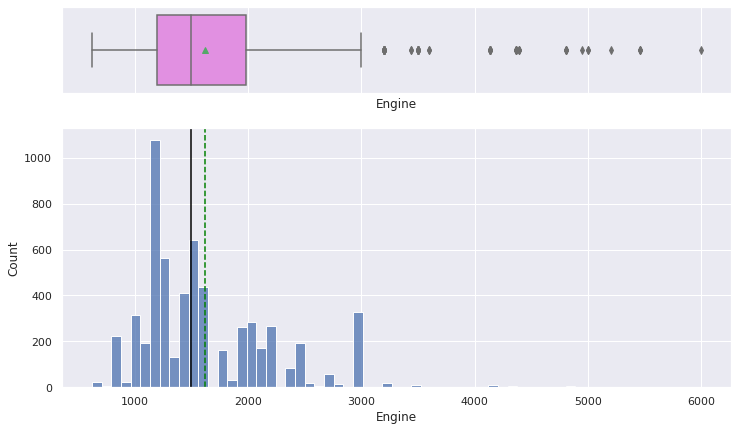

In [45]:
histogram_boxplot(used_cars, "Engine")

* The distribution is slightly right skewed and has outliers to the right of the mean. There do not appear to be any 0 values. 

#### Power

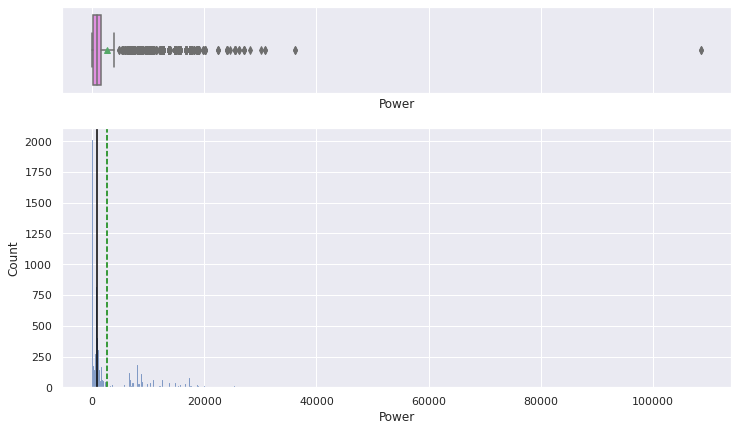

In [46]:
histogram_boxplot(used_cars, "Power")

* There is one very extreme outlier that is disrupting the view of the distribution. It does still appear that the distribution is right skewed. 

##### Outliers

In [49]:
used_cars.drop(used_cars[used_cars['Power'] > 35000].index, inplace = True)

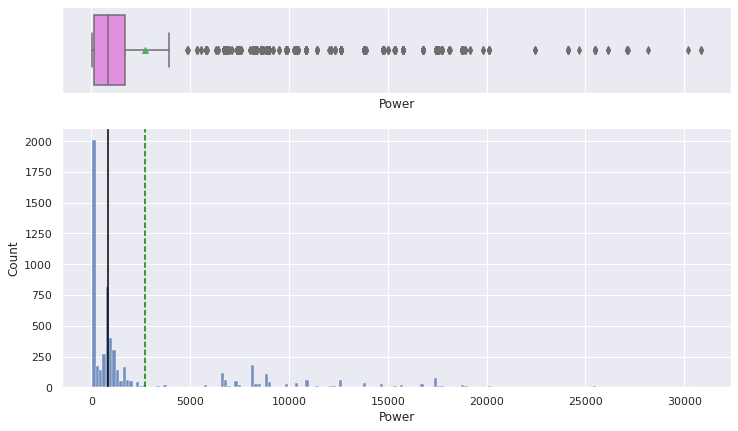

In [50]:
histogram_boxplot(used_cars, "Power")

#### Log Transformation

In [51]:
# Creates a new column with the log of the kilometers driven
used_cars["Power_log"] = np.log(used_cars["Power"])

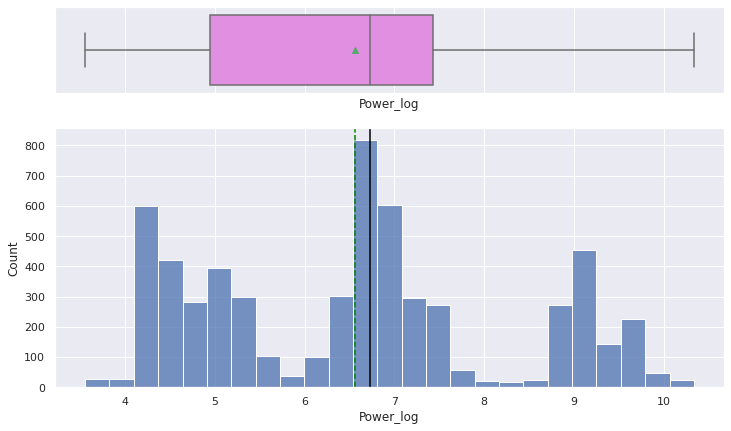

In [52]:
histogram_boxplot(used_cars, "Power_log")

* The log transformation removed the skewness, and the log distribution helps to highlight the multi-distribution of the power variable. 

#### Seats

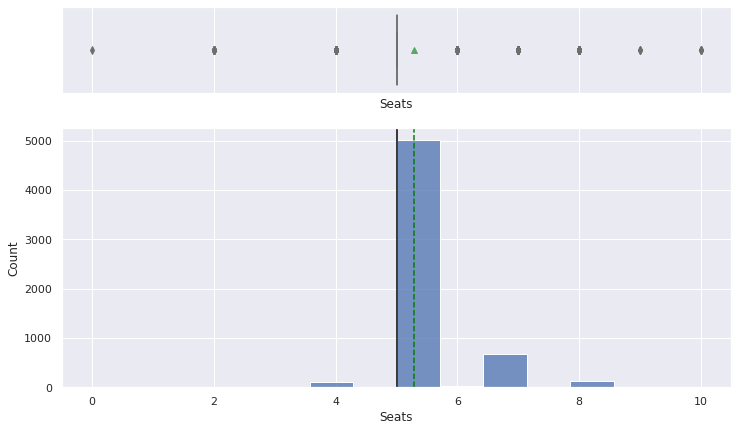

In [53]:
histogram_boxplot(used_cars, "Seats")

* As mentioned before, there are 0 values that need to be dealt with, but otherwise the the data has a high representation of 5 seat cars.

In [54]:
# Check for zeros
used_cars.sort_values(by=["Seats"], ascending=True).head(10)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Make,Model,kilometers_driven_log,Power_log
3999,Hyderabad,125000,Petrol,Automatic,First,10.0,3197.0,NaN,0.0,18.00,9,audi,a4,11.736069,NaN
4893,Kochi,9952,Petrol,Automatic,First,10.3,2979.0,306.0,2.0,58.54,3,bmw,z4,9.205529,5.723585
1078,Kolkata,10512,Petrol,Automatic,First,8.0,2706.0,265.0,2.0,64.00,6,porsche,boxster,9.260273,5.579730
5294,Delhi,25000,Petrol,Automatic,First,10.3,2979.0,306.0,2.0,30.00,10,bmw,z4,10.126631,5.723585
926,Hyderabad,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,40.00,11,porsche,cayman,9.210340,NaN
5919,Hyderabad,8000,Petrol,Automatic,First,12.0,5000.0,4881.0,2.0,100.00,6,jaguar,f,8.987197,8.493105
557,Delhi,12100,Petrol,Automatic,First,9.0,1984.0,2078.0,2.0,29.50,8,audi,tt,9.400961,7.639161
798,Bangalore,10000,Petrol,Automatic,First,18.0,3498.0,306.0,2.0,55.00,6,mercedes-benz,slk-class,9.210340,5.723585
915,Pune,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,13,smart,fortwo,11.542484,NaN
2305,Mumbai,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,43.00,10,porsche,cayman,8.987197,NaN


* Based on other data entries an Audi A4 has 5 seats so we can replace the 0 value.

In [55]:
# Replaces the value based on the index location
used_cars.loc[3999, "Seats"] = 5.0

#### Age

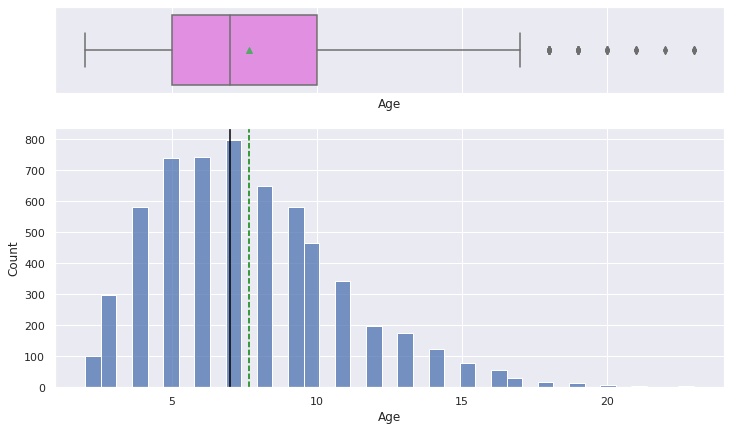

In [56]:
histogram_boxplot(used_cars, "Age")

* The distribution is slightly right skewed with a few outliers to the right of the mean.

#### Price

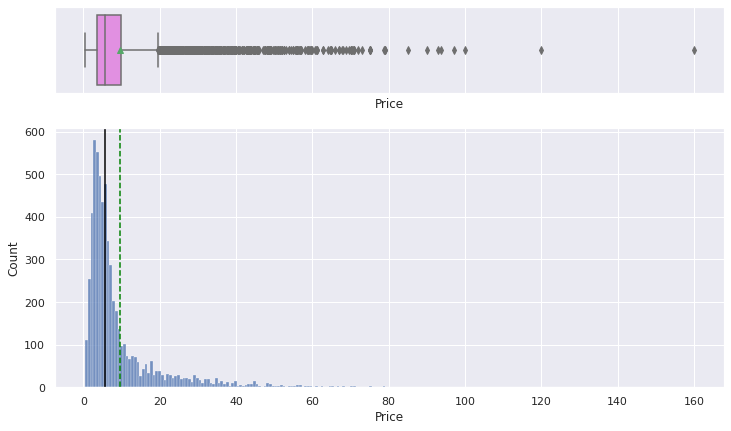

In [57]:
histogram_boxplot(used_cars, "Price")

* There are a few extreme outliers and the distribution is right skewed. The two major outliers are Italian luxury sports cars which we all know are very expensive. Since these partifular vehicle retain such a high price and can introduce unnecessary noise to the model, we'll simply remove these rows. 

##### Outliers

In [58]:
used_cars.drop(used_cars[used_cars["Price"] > 110].index, inplace = True)

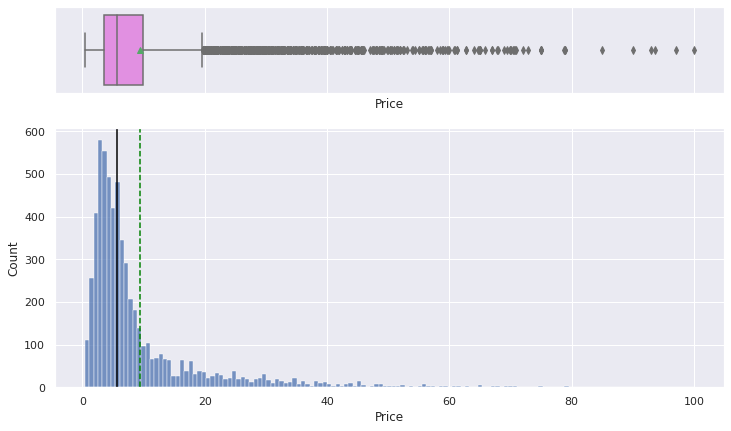

In [59]:
histogram_boxplot(used_cars, "Price")

* The distribution is still heavily right skewed after removing the outliers.

#### Labeled Barplot Function

In [60]:
# Fucntion to create labeled bar plots with percentages
# for each categorical variable


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

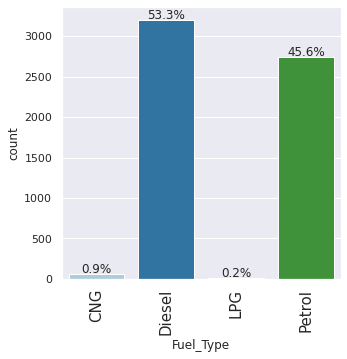

In [61]:
labeled_barplot(used_cars, "Fuel_Type", perc=True)

* The majority of the vehicles are diesel (53.3%) and pretol (45.6%).

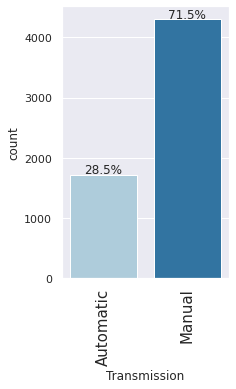

In [62]:
labeled_barplot(used_cars, "Transmission", perc=True)

* The vast majority of cars have a manual transmission (71.4%). 

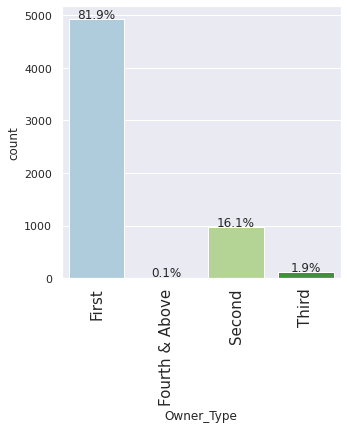

In [63]:
labeled_barplot(used_cars, "Owner_Type", perc=True)

* The overwhelming majority of the cars have been owned by only one person (81.9%).

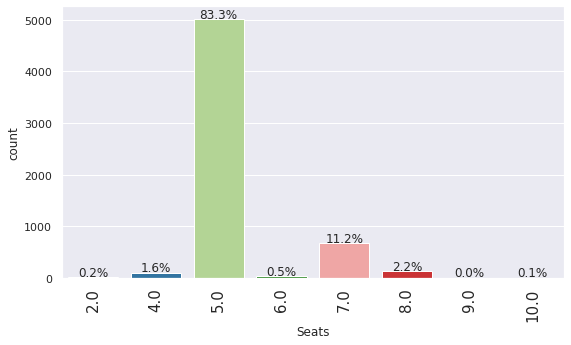

In [64]:
labeled_barplot(used_cars, "Seats", perc=True)

* Most cars have 5 seats (83.3%) followe3d by 7 seats (11.2%). There are also some vehicles with 0 seats which isn't possible so we'll need to clean up those values. 

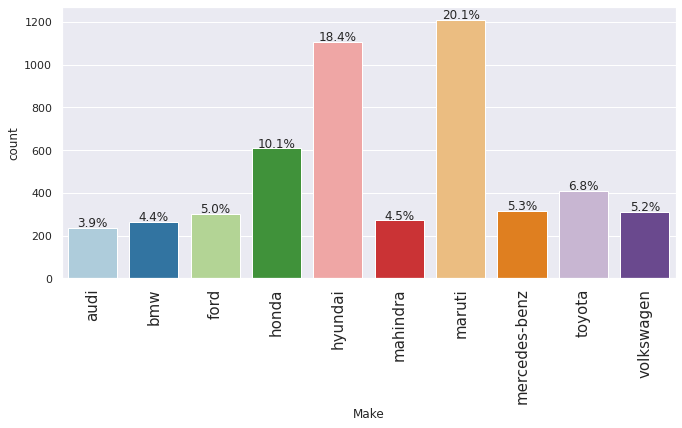

In [65]:
labeled_barplot(used_cars, "Make", perc=True, n=10)

* The most repsented vehicles are Murati (20.1%), Hyundai (18.4%), and Honda (10.1%) with the remaining 51.4% of makes being divided among several other brands.

### Bivariate Analysis

In [66]:
used_cars.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Power_log
Kilometers_Driven,1.000000,-0.131262,0.158589,-0.104449,0.211344,-0.166613,0.448338,0.815439,-0.149770
Mileage,-0.131262,1.000000,-0.614135,0.022494,-0.330059,-0.316729,-0.281795,-0.119483,0.082074
Engine,0.158589,-0.614135,1.000000,0.052624,0.408632,0.661322,0.053275,0.153445,0.005013
Power,-0.104449,0.022494,0.052624,1.000000,-0.105364,0.184987,-0.169112,-0.103591,0.807349
Seats,0.211344,-0.330059,0.408632,-0.105364,1.000000,0.070712,-0.013703,0.189471,-0.108481
Price,-0.166613,-0.316729,0.661322,0.184987,0.070712,1.000000,-0.310302,-0.186291,0.114506
Age,0.448338,-0.281795,0.053275,-0.169112,-0.013703,-0.310302,1.000000,0.501494,-0.244090
kilometers_driven_log,0.815439,-0.119483,0.153445,-0.103591,0.189471,-0.186291,0.501494,1.000000,-0.142533
Power_log,-0.149770,0.082074,0.005013,0.807349,-0.108481,0.114506,-0.244090,-0.142533,1.000000


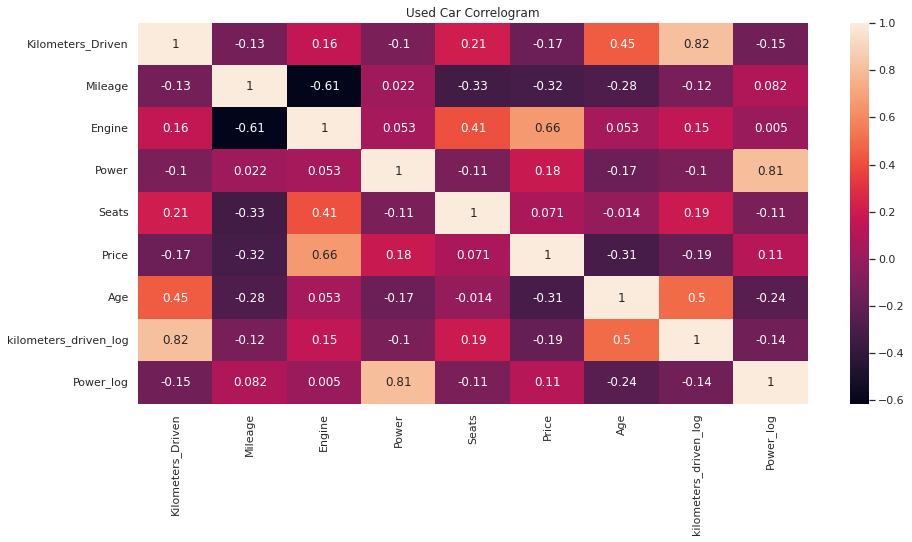

In [67]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.heatmap(used_cars.corr(), annot=True)
plt.title('Used Car Correlogram')
plt.show()

* `Price` vs `Engine`: There is a relatively significant positive correlation between the price of a vehicle and the engine size.
* `Price` vs `Seats`: There is also a relatively high positive correlation between the price adn n umber of seats which makes sense because the larger an engine, the larger the vehicle, and thus the more seats. 
* `Price` vs `Age` and `Mileage`: Both age and mileage have a slight negative correaltion with price which also makes sense becuase an older vehicle typically will have higher mileage. 


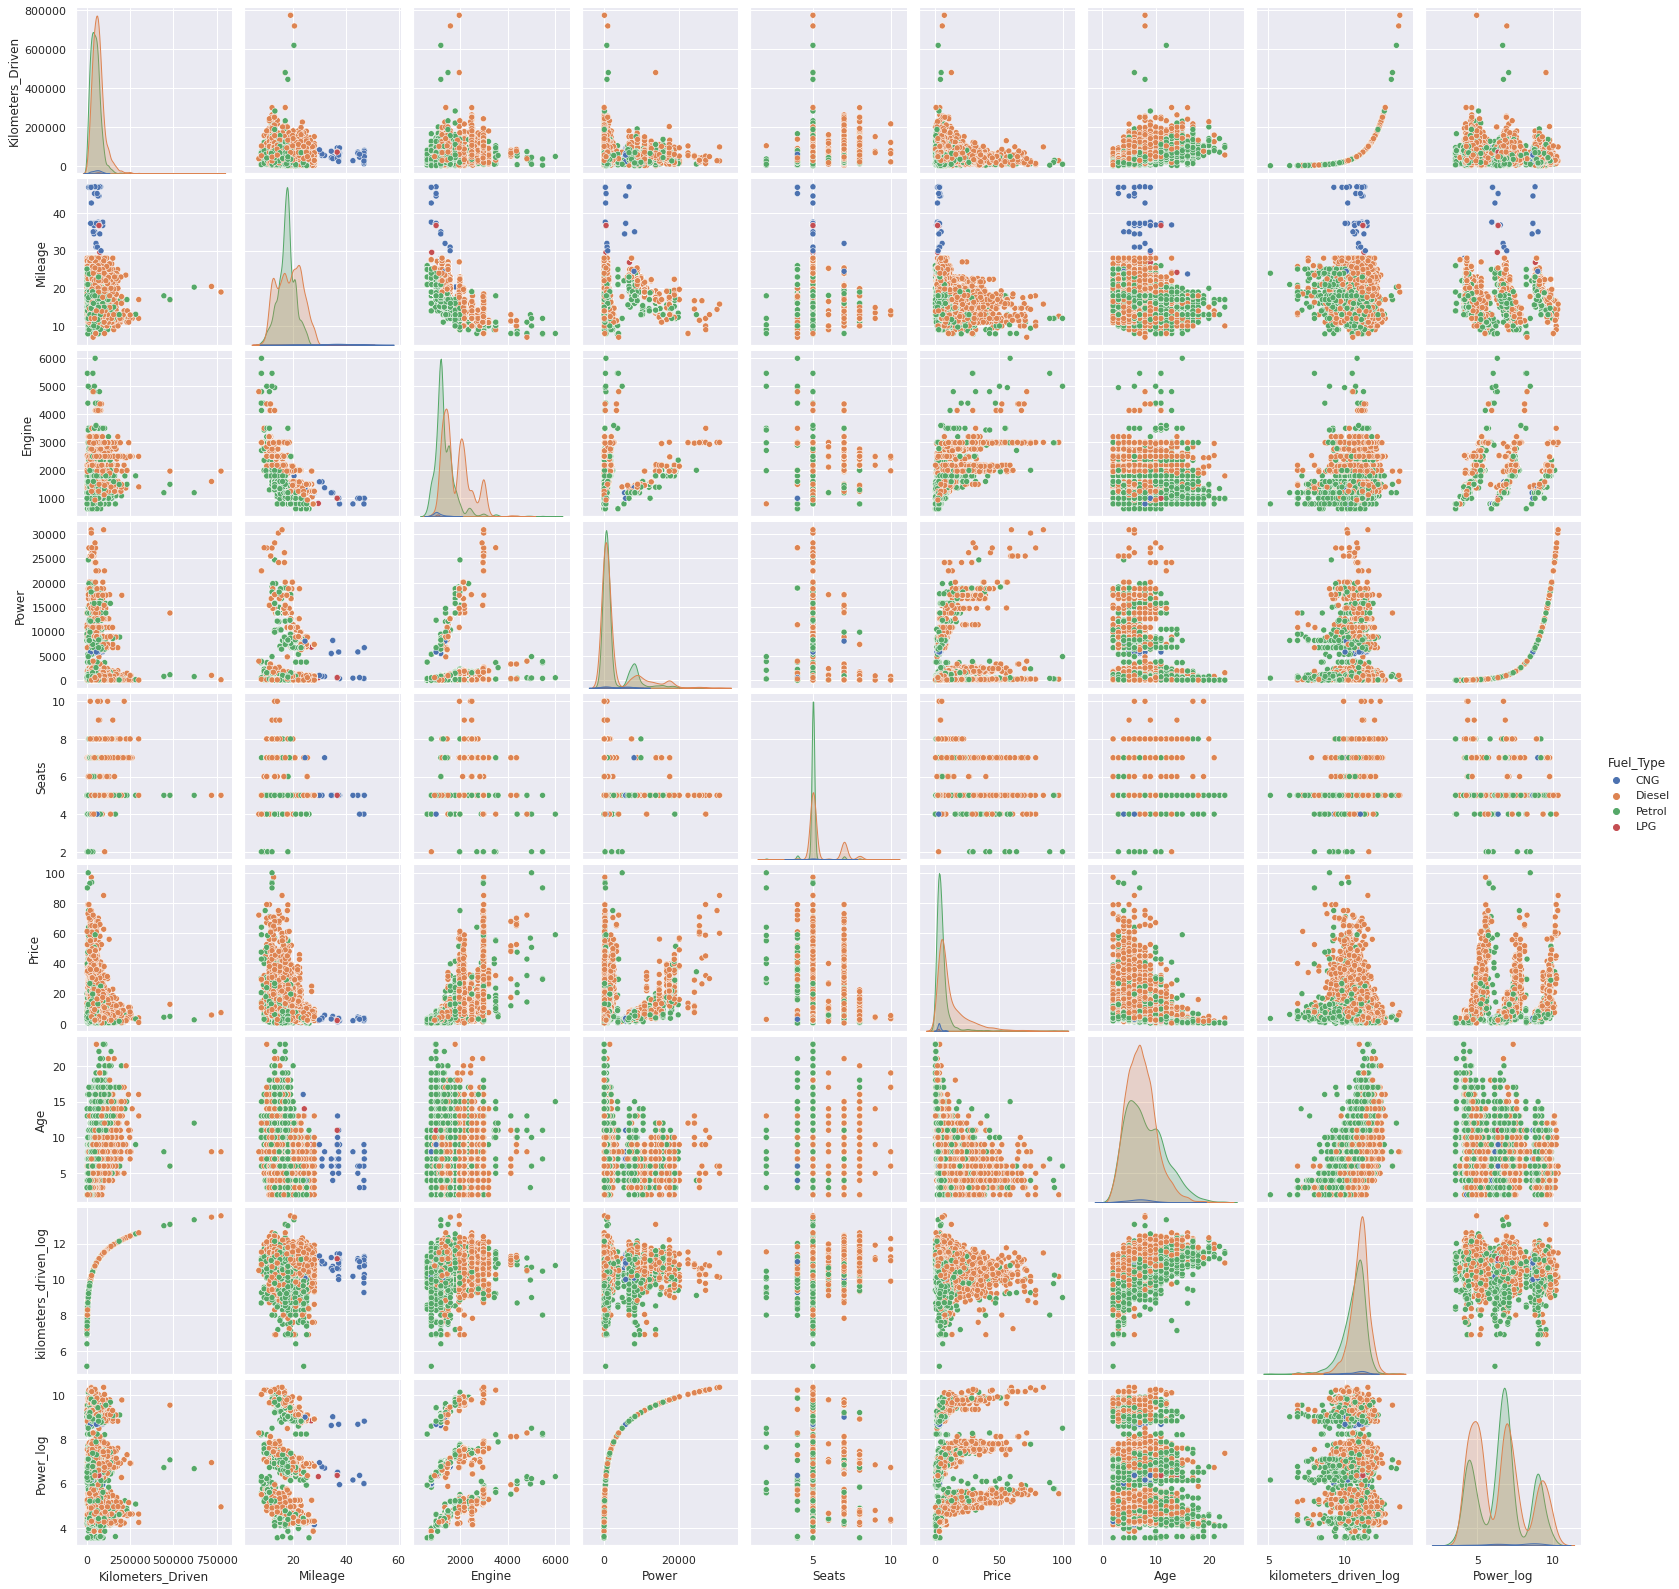

In [68]:
sns.pairplot(data=used_cars, hue="Fuel_Type")
plt.show()

## Imputing Missing Values

For this execerise I've decided to replace the missing values with the median value as the median is more robust to outliers than the arithmetic mean.

In [69]:
# Displays the null values in the form of a percentage
print(used_cars.isna().mean().round(4) * 100)

Location                 0.00
Kilometers_Driven        0.00
Fuel_Type                0.00
Transmission             0.00
Owner_Type               0.00
Mileage                  1.13
Engine                   0.60
Power                    2.38
Seats                    0.70
Price                    0.00
Age                      0.00
Make                     0.00
Model                    0.00
kilometers_driven_log    0.00
Power_log                2.38
dtype: float64


In [70]:
# Replaces all the missing values with the median value for every column
cols = ["Mileage","Engine","Power","Seats","Power_log"]
median_impute = lambda x: x.fillna(x.median())
used_cars[cols] = used_cars[cols].apply(median_impute, axis=0)
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6010 non-null   object 
 1   Kilometers_Driven      6010 non-null   int64  
 2   Fuel_Type              6010 non-null   object 
 3   Transmission           6010 non-null   object 
 4   Owner_Type             6010 non-null   object 
 5   Mileage                6010 non-null   float64
 6   Engine                 6010 non-null   float64
 7   Power                  6010 non-null   float64
 8   Seats                  6010 non-null   float64
 9   Price                  6010 non-null   float64
 10  Age                    6010 non-null   int64  
 11  Make                   6010 non-null   object 
 12  Model                  6010 non-null   object 
 13  kilometers_driven_log  6010 non-null   float64
 14  Power_log              6010 non-null   float64
dtypes: f

In [71]:
# Displays the null values in the form of a percentage
print(used_cars.isna().mean().round(4) * 100)

Location                 0.0
Kilometers_Driven        0.0
Fuel_Type                0.0
Transmission             0.0
Owner_Type               0.0
Mileage                  0.0
Engine                   0.0
Power                    0.0
Seats                    0.0
Price                    0.0
Age                      0.0
Make                     0.0
Model                    0.0
kilometers_driven_log    0.0
Power_log                0.0
dtype: float64


In [72]:
used_cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6010,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,6010.0,NaN,NaN,NaN,57708.488852,37881.602496,171.0,34000.0,53000.5,73000.0,775000.0
Fuel_Type,6010,4,Diesel,3201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6010,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6010,4,First,4921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6010.0,NaN,NaN,NaN,18.195485,4.493176,7.0,15.0,18.0,21.0,46.956
Engine,6010.0,NaN,NaN,NaN,1619.267388,596.90592,624.0,1198.0,1493.0,1968.0,5998.0
Power,6010.0,NaN,NaN,NaN,2650.601498,4529.316829,35.0,140.0,838.0,1685.0,30843.0
Seats,6010.0,NaN,NaN,NaN,5.279534,0.800689,2.0,5.0,5.0,5.0,10.0
Price,6010.0,NaN,NaN,NaN,9.406459,10.852515,0.44,3.5,5.615,9.9425,100.0


## Encoding Categorical Variables

As mentioned before, we have string variables which need to be represented as a numeric value. This is where encoding comes in hand. We can represent text with numeric value either with a the boolean 0 or 1, or by representing it with a ranking of whatever value makes sense for the text. 

In [73]:
# Check the different levels for the categorical variable Transmission
used_cars.Transmission.value_counts()

Manual       4299
Automatic    1711
Name: Transmission, dtype: int64

### Manual Encoding

Is the levels of the categorical variable are low, then it is rasonable to simple encode these variables manually. 

In [ ]:
# Manually encodes a numeric value to the Transmission column
tran_encode = {"Manual": 1,
               "Automatic": 0}

used_cars["Transmission"] = used_cars["Transmission"].map(tran_encode) 

used_cars.Transmission.value_counts()

1    4299
0    1713
Name: Transmission, dtype: int64

In [ ]:
used_cars.Owner_Type.value_counts()

First             4923
Second             968
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
# Uses the same encoding mehod as Transmission
owners_dict = {"First": 1,
               "Second": 2,
               "Third": 3,
               "Fourth & Above": 4}
used_cars["Owner_Type"] = used_cars["Owner_Type"].map(owners_dict) 

used_cars.Owner_Type.value_counts()   

1    4923
2     968
3     112
4       9
Name: Owner_Type, dtype: int64

### One Hot Encoding

In other instances, the variables have so many levels it may be wiser to use function which convert them to binary columns with a numerical True or False indicator.

In [74]:
# Create dummy variables for the different levels of Location and Fuel Type
used_cars = pd.get_dummies(used_cars, drop_first=True)
used_cars.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_audi,Make_bentley,Make_bmw,Make_chevrolet,Make_datsun,Make_fiat,Make_force,Make_ford,Make_honda,Make_hyundai,Make_isuzu,Make_jaguar,Make_jeep,Make_land,...,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,72000,37.24,998.0,5816.0,5.0,1.75,11,11.184421,8.668368,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,19.60,1582.0,1262.0,5.0,12.50,6,10.621327,7.140453,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,18.00,1199.0,887.0,5.0,4.50,10,10.736397,6.787845,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,20.70,1248.0,8876.0,7.0,6.00,9,11.373663,9.091106,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,15.00,1968.0,1408.0,5.0,17.74,8,10.613246,7.249926,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6018
Columns: 260 entries, Kilometers_Driven to Model_zest
dtypes: float64(7), int64(2), uint8(251)
memory usage: 2.0 MB


## Multiple Linear Rregession

With a clean dataset we can now train our model. We first divide the data between the target (Price) and the predictors (all other variables). Then we split the data into 70% for training and 30% for testing to validate the model performance. Finally, we evaluate our model and interpret the output to help drive our business decisions. 

### Split the Data

In [76]:
# Drop the column that have a log conversion
used_cars = used_cars.drop(["Power","Kilometers_Driven"], axis=1)

In [77]:
# Independent variables
X = used_cars.drop(["Price"], axis=1)
# Dependent variable
y = used_cars["Price"]

In [95]:
# Splite the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [96]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3606
Number of rows in test data = 2404


### Train the Model

In [97]:
# Intialize the regression algorithm
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(reg_model.coef_, reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.103108
Engine,0.001410
Seats,0.849570
Age,-1.002654
kilometers_driven_log,-1.301299
...,...
Model_yeti,-0.747391
Model_z4,37.979145
Model_zen,5.367334
Model_zest,-11.049426


#### Interpreting the Coefficients
* The 

### Evaluate the Model

* We will usie the metric functions from the sklearn module for RMSE, MAE, and $R^2$.
* We will define our own function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [99]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [100]:
# Checking model performance on train set
print("Training Performance:")
reg_model_perf_train = model_performance_regression(reg_model, X_train, y_train)
reg_model_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,8.963261e+38,2.042270e+37,0.999996,0.999996,5.536002e+10


In [108]:
round(reg_model.score(X_train, y_train),2)

0.87

* sklearn's $R^2$ is not registering properly from the scoring package. However, the model's $R^2$ reflects a more accurate measurement. This may be due to small sample size fo the dataset. Fromt his first metric it would appear the model has overfit pretty dramatically, but the score stored in the model itself is more reasonable, although not a very good score at all.

In [101]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(reg_model, X_test, y_test)
lin_reg_model_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.927508e+40,5.970778e+38,-0.000416,-0.120224,5.065777e+16


In [109]:
round(reg_model.score(X_test, y_test),2)

0.82

* Although relatively low for an $R^2$ score, the training and test set are relatively close which indicates the model is not overfitting. 

In [102]:
used_cars.dtypes

Mileage       float64
Engine        float64
Seats         float64
Price         float64
Age             int64
               ...   
Model_xylo      uint8
Model_yeti      uint8
Model_z4        uint8
Model_zen       uint8
Model_zest      uint8
Length: 258, dtype: object

### Forward Feature Selection

* Forward feature selection works by adding a variable sequentially and scoring the model performance with each new variable introduced. Once we score the model with every variable sequentially added, we can graph the incremental improvement in the $R^2$ score and limit the number of features in our model to the optimal point at which the score plateaus. This helps to reduce the complexity of the model and elminte features that don't contribute to the overall performance. 

In [103]:
X_train.shape

(3606, 257)

In [104]:

reg = LinearRegression()

# Build forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1], # k_features denotes "Number of features to select" 
    forward=True,  
    floating=False,
    scoring="r2",
    verbose=2,
    #n_jobs=-1,  # this will ensure all CPU cores are being used for computation but isn't required in a colab notebook
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    2.3s finished

[2022-02-05 17:30:24] Features: 1/257 -- score: 0.4366567014342234[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:    2.5s finished

[2022-02-05 17:30:27] Features: 2/257 -- score: 0.5581336240312353[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:    2.6s finished

[2022-02-05 17:30:30] Features: 3/257 -- score: 0.6260736624697376[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

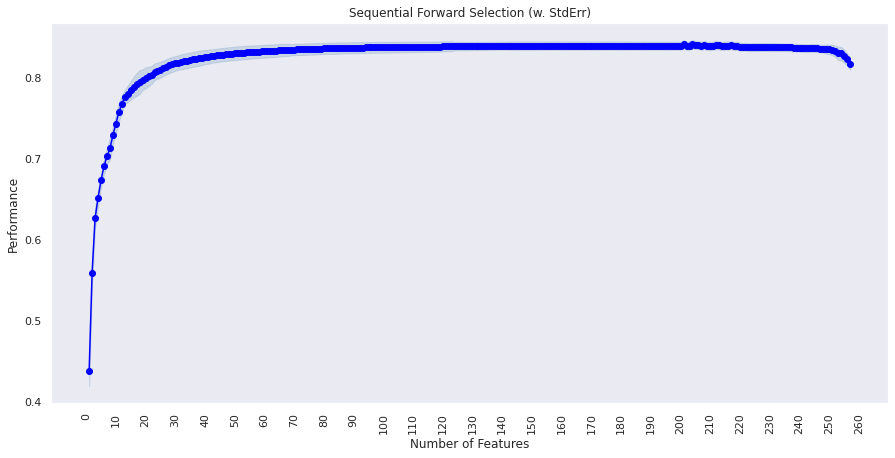

In [106]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err")
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(
    np.arange(0, 264, 10), np.arange(0, 264, 10), rotation=90
)  # to make the tick marks readable
plt.grid()
plt.show()

In [110]:

reg = LinearRegression()

# Limit to the optimal number of features
sfs = SFS(
    reg,
    k_features=80, # Number of features to select
    forward=True,  
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:    2.3s finished

[2022-02-05 19:21:45] Features: 1/80 -- score: 0.4366567014342234[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:    2.5s finished

[2022-02-05 19:21:47] Features: 2/80 -- score: 0.5581336240312353[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed:    2.6s finished

[2022-02-05 19:21:50] Features: 3/80 -- score: 0.6260736624697376[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [111]:
# Important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 16, 18, 19, 23, 24, 25, 27, 34, 35, 36, 37, 39, 40, 43, 47, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 65, 66, 67, 70, 72, 82, 91, 100, 102, 103, 105, 111, 117, 125, 127, 131, 132, 134, 135, 136, 138, 141, 143, 153, 159, 170, 184, 185, 189, 200, 204, 209, 215, 221, 235, 239, 240, 246, 247, 248, 251, 252, 255]


In [112]:
X_train.columns[feat_cols]

Index(['Mileage', 'Engine', 'Seats', 'Age', 'kilometers_driven_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Make_audi', 'Make_bentley', 'Make_bmw',
       'Make_datsun', 'Make_jaguar', 'Make_jeep', 'Make_land', 'Make_mahindra',
       'Make_mercedes-benz', 'Make_mini', 'Make_porsche', 'Make_tata',
       'Make_volkswagen', 'Make_volvo', 'Model_3', 'Model_5', 'Model_7',
       'Model_800', 'Model_a', 'Model_a-star', 'Model_a3', 'Model_a4',
       'Model_accord', 'Model_alto', 'Model_amaze', 'Model_aveo', 'Model_b',
       'Model_c-class', 'Model_city', 'Model_corolla', 'Model_cr-v',
       'Model_creta', 'Model_cruze', 'Model_eeco', 'Model_ertiga',
       'Model_figo', 'Model_fortuner', 'Model_getz', 'Model_gl-class',
       'Model_glc', 'Model_gle', 'Model_gls', 'Model_grand', 'Model_i10',
  

In [113]:
# Create a new training set with the 80 features
X_train2 = X_train[X_train.columns[feat_cols]]

In [114]:
# Create a new test set with the selected features from the training set 
X_test2 = X_test[X_train2.columns]

In [115]:
# Fitting linear model
reg_model2 = LinearRegression()
reg_model2.fit(X_train2, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(reg_model2.coef_, reg_model2.intercept_.flatten()),
    index=X_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.216046
Engine,0.004187
Seats,-0.069790
Age,-0.963393
kilometers_driven_log,-1.285465
...,...
Model_xf,-33.247893
Model_xuv500,1.841836
Model_xylo,-4.099674
Model_zen,6.403688


In [116]:
# model performance on train set
print("Training Performance:")
reg_model2_perf_train = model_performance_regression(
    reg_model2, X_train2, y_train
)
reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.476475e+41,7.474990e+39,-0.000279,-0.02298,1.035341e+12


In [118]:
round(reg_model2.score(X_train2, y_train),2)

0.85

In [117]:
# model performance on test set
print("Test Performance:")
lin_reg_model3_perf_test = model_performance_regression(reg_model2, X_test2, y_test)
lin_reg_model3_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.927508e+40,5.970778e+38,-0.000416,-0.034869,5.719147e+19


In [119]:
round(reg_model2.score(X_test2, y_test),2)

0.82

## Extracting Predicted Values

In [123]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_data = used_cars[used_cars.index.isin(X_train2.index.values)].copy()

# Extracting predicted values and residuals from the final model
fitted_values = reg_model2.predict(X_train2)
residuals = fitted_values - y_train

# Add new columns for predicted values
original_data["Predicted Price"] = fitted_values
original_data["residuals"] = residuals
original_data["Abs_residuals"] = np.exp(residuals)
original_data["Difference in Price"] = np.abs(
    original_data["Price"] - original_data["Predicted Price"]
)

# View the closest predictions by difference in price and predicted price
original_data.sort_values(by=["Difference in Price"], ascending=True).head(20)

,Mileage,Engine,Seats,Price,Age,kilometers_driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_audi,Make_bentley,Make_bmw,Make_chevrolet,Make_datsun,Make_fiat,Make_force,Make_ford,Make_honda,Make_hyundai,Make_isuzu,Make_jaguar,Make_jeep,Make_land,Make_mahindra,Make_maruti,...,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Predicted Price,residuals,Abs_residuals,Difference in Price
442,15.9,2523.0,7.0,7.70,5,11.323652,6.431331,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.693440,4.655709,105.183728,0.006560
284,17.0,1591.0,5.0,4.28,9,10.902427,7.100852,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.286628,-0.172005,0.841975,0.006628
3880,17.0,1497.0,5.0,7.10,6,10.240103,7.067320,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.107780,0.665775,1.945997,0.007780
5462,19.0,1248.0,5.0,2.75,11,11.326596,6.605298,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.739732,-1.004101,0.366374,0.010268
5292,20.3,1197.0,5.0,3.22,9,10.527633,6.670766,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.208246,0.681240,1.976327,0.011754
1557,26.0,1498.0,5.0,7.00,6,10.404263,6.893656,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.987269,1.110275,3.035192,0.012731
4705,22.7,796.0,5.0,4.12,5,9.800513,6.159095,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.103205,2.921767,18.574074,0.016795
4650,17.0,1995.0,5.0,10.00,9,11.350407,5.214936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.016924,6.799334,897.249426,0.016924
5931,16.0,1373.0,7.0,5.25,9,10.868568,6.842683,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.231669,-1.745778,0.174509,0.018331
4765,16.0,1373.0,7.0,6.25,7,11.144641,6.842683,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.270274,-1.173872,0.309167,0.020274


In [127]:
# View the most expensive cars and features of those cars
original_data.sort_values(by=["Price"], ascending=False).head(50)

,Mileage,Engine,Seats,Price,Age,kilometers_driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_audi,Make_bentley,Make_bmw,Make_chevrolet,Make_datsun,Make_fiat,Make_force,Make_ford,Make_honda,Make_hyundai,Make_isuzu,Make_jaguar,Make_jeep,Make_land,Make_mahindra,Make_maruti,...,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Predicted Price,residuals,Abs_residuals,Difference in Price
5919,12.0,5000.0,2.0,100.00,6,8.987197,8.493105,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.025080,-2.505900e+01,1.309222e-11,88.974920
1974,12.0,2979.0,5.0,93.67,3,10.242100,5.768321,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.952929,-4.272083e+01,2.796282e-19,88.717071
1984,12.0,2979.0,5.0,93.00,4,9.767954,5.768321,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.743765,-4.220699e+01,4.674514e-19,62.256235
4691,12.0,5461.0,2.0,90.00,7,8.006368,6.042633,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.970886,-1.632411e+01,8.138231e-08,76.029114
5535,15.8,2993.0,5.0,85.00,6,11.482497,10.336665,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.678501,-4.529471e+01,2.131848e-20,77.321499
655,9.4,1999.0,5.0,75.00,4,9.259226,7.772332,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7.417620,-1.240134e+01,4.113081e-06,67.582380
2659,17.8,2967.0,4.0,75.00,6,10.130623,5.703782,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.745899,-2.932637e+01,1.835350e-13,73.254101
1583,14.7,2967.0,7.0,72.94,2,8.820699,5.501258,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.719392,-2.467668e+01,1.918917e-11,55.220608
418,11.0,2996.0,5.0,70.99,3,10.016682,5.905362,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.825748,-1.805427e+01,1.442546e-08,66.164252
1690,11.5,2987.0,5.0,70.80,3,10.599855,10.145610,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.918031,-7.405260e+00,6.080460e-04,65.881969


In [128]:
# View where the predictions were closest to the true price
original_data.sort_values(by=["Difference in Price"], ascending=True).head(50)

,Mileage,Engine,Seats,Price,Age,kilometers_driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_audi,Make_bentley,Make_bmw,Make_chevrolet,Make_datsun,Make_fiat,Make_force,Make_ford,Make_honda,Make_hyundai,Make_isuzu,Make_jaguar,Make_jeep,Make_land,Make_mahindra,Make_maruti,...,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Predicted Price,residuals,Abs_residuals,Difference in Price
442,15.9,2523.0,7.0,7.70,5,11.323652,6.431331,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.693440,4.655709,105.183728,0.006560
284,17.0,1591.0,5.0,4.28,9,10.902427,7.100852,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.286628,-0.172005,0.841975,0.006628
3880,17.0,1497.0,5.0,7.10,6,10.240103,7.067320,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.107780,0.665775,1.945997,0.007780
5462,19.0,1248.0,5.0,2.75,11,11.326596,6.605298,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.739732,-1.004101,0.366374,0.010268
5292,20.3,1197.0,5.0,3.22,9,10.527633,6.670766,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.208246,0.681240,1.976327,0.011754
1557,26.0,1498.0,5.0,7.00,6,10.404263,6.893656,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.987269,1.110275,3.035192,0.012731
4705,22.7,796.0,5.0,4.12,5,9.800513,6.159095,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.103205,2.921767,18.574074,0.016795
4650,17.0,1995.0,5.0,10.00,9,11.350407,5.214936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.016924,6.799334,897.249426,0.016924
5931,16.0,1373.0,7.0,5.25,9,10.868568,6.842683,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.231669,-1.745778,0.174509,0.018331
4765,16.0,1373.0,7.0,6.25,7,11.144641,6.842683,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.270274,-1.173872,0.309167,0.020274


## Observations

* As the price increases, so too does the error in the predictions. This could be that the skewness in the data cannot be generalized well by the model. 
* The model does capture ~82% of the variance in the data. Removing more outliers or gathering more data points may increase the model's ability to predict the proper price. 
* The price of the vehicles needs to be analyzed thoroughly to determine the business strategy to maximize profitability. 


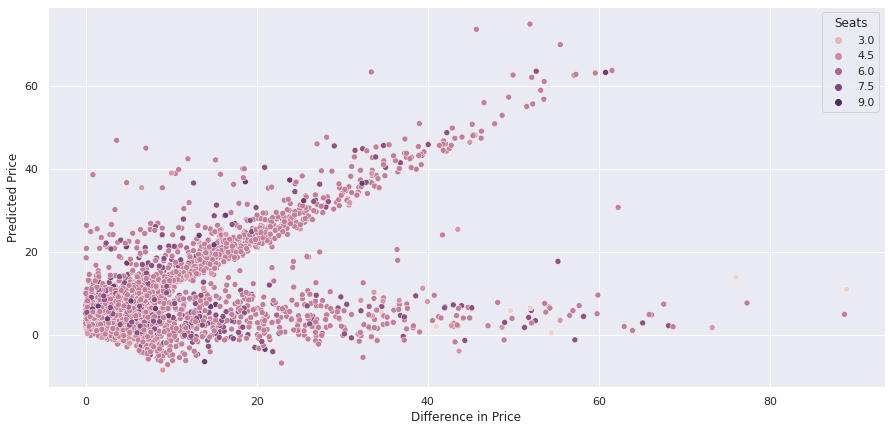

In [141]:
sns.scatterplot(
      data=original_data,
      x="Difference in Price",
      y="Predicted Price",
      hue=original_data["Seats"]
)

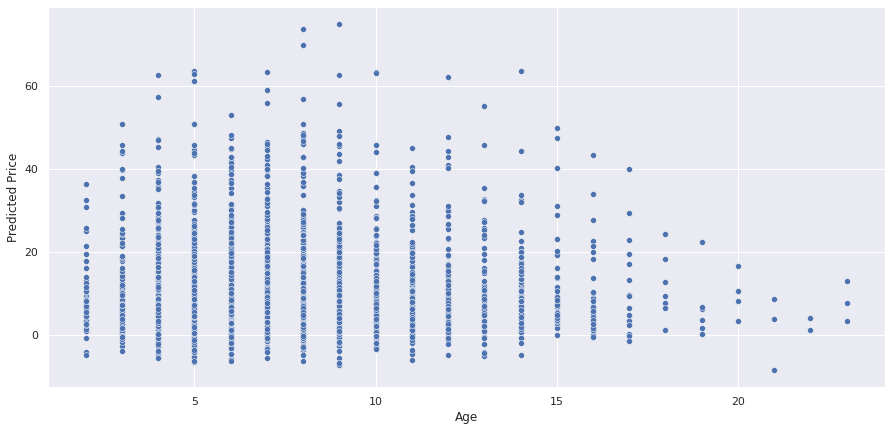

In [142]:
sns.scatterplot(
      data=original_data,
      x="Age",
      y="Predicted Price"
)

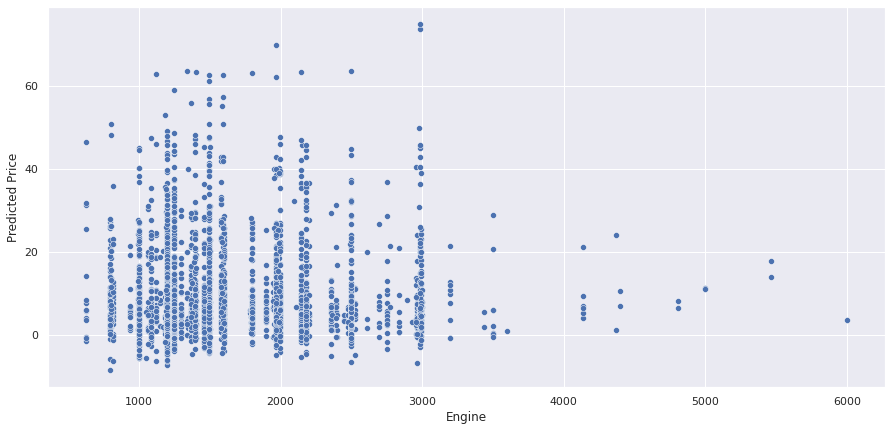

In [138]:
sns.scatterplot(
      data=original_data,
      x="Engine",
      y="Predicted Price"
)

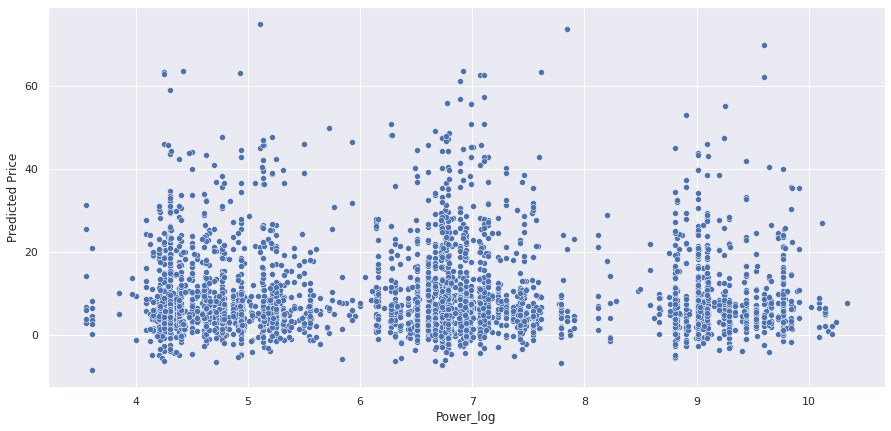

In [137]:
sns.scatterplot(
      data=original_data,
      x="Power_log",
      y="Predicted Price"
)

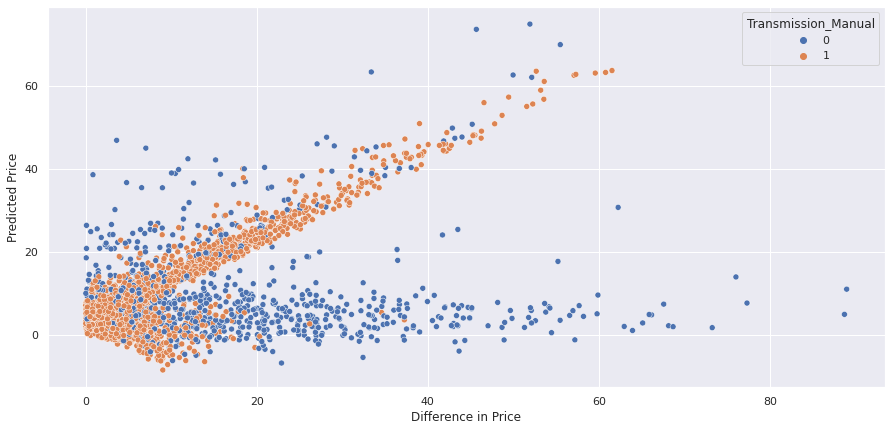

In [139]:
sns.scatterplot(
      data=original_data,
      x="Difference in Price",
      y="Predicted Price",
      hue=original_data["Transmission_Manual"]
)

## Business Insights and Actions

Given the goal of understand the market and pricing of used cars, our regression model has helped to provide insight of a number of important factors:

*   The higher the price the more the seats of the car tend around the average number of seats for the cars. 
* Power is not a great indicator or price, but shows the higher prices tend to cluster around 3 different groups of engine power. 
*   The Transmission of the vehicle is an important factor. Manual transmission trend towards a higher price than automatic transmission. 
*   Location is also an important factor for both positive and negative reasons. We can see that the market favors higher prices in cities such as Bangalore, Chennai, Hyderabad, and Jaipur. Conversely, we can see that used cars sell for less in cities such as Kolkata and Mumbai.






